# Solving a Stochastic OLG Model using DSGE Tools

### by [Kerk L. Phillips](https://sites.google.com/site/kerkphillips/home), July 2018

The code in this Jupyter notebook was written using Python 3.6.

This notebook explains how to set up, solve and simulate an overlapping generations (OLG) model using the tools from DSGE modeling.  This notebook uses the linearization techniques implemented in the LinApp package.  This package can be downloaded at the following Github site.  [https://github.com/kerkphil/DSGE-Utilities](https://github.com/kerkphil/DSGE-Utilities).  Alternatively, both those files and this notebook can be found in the public GitHub repository [https://github.com/kerkphil/Jupyter_Notebooks](https://github.com/kerkphil/Jupyter_Notebooks).

The LinApp package includes the following files:

LinApp_FindSS - Takes a function, funcname.py, and a steady state value for the exogenous state variables as inputs.  Finds the steady state for the model's endogenous state and jump variables.

LinApp_Deriv - Takes a function, funcname.py, as an input.   Generates the derivative matrices needed for the Uhlig toolkit.

LinApp_Solve - Takes the derivative matrices as inputs.  Uses the code from the Uhlig toolkit to generate the coefficients for the linearized policy function(s).

LinApp_Sim - Takes the policy function coefficients and current state as inputs.  Generates the value(s) of the endogenous state variables for the next period.

LinApp_SSL - Takes a history of exogenous state variables and the policy function coefficients as inputs.  Generates a history of state and jump variables using linearization about the steady state.

## A Model

We begin by writing down the behavioral equations for a simple OLG model.

We use the following definitions:

$k_{st}$ is the capital stock in period $t$ for a household of age $s$.

$K_t$ is the aggregate capital stock in period $t$

$z_t$ is the percent deviation of technology from its long-run value.

$r_t$ is the rental rate on capital.

$w_t$ is the wage rate.

$c_{st}$ is private consumption.

$T_{t}$ is a lump-sum transfer from the government.

$\varepsilon_t$ is the random innovation to $z_t$

We also have the following parameters:
$\alpha$ is the capital share in GDP.

$\beta$ is the subjective discount factor.

$\gamma$ is the curvature of the utility function.  In our example this is the constant elasticity of intertemporal substitition.  It is also the constant coefficient of relative risk aversion.

$\delta$ is the rate of capital depreciation.

$\tau$ is the flat income tax rate.

$\rho$ is the autocorrelation of $z_t$.

$\sigma$ is the standard deviation of the $\varepsilon_t$ shocks.

Suppose the household's Bellman equation is given by:
$$ V_s(k_{st};\theta_t) = \max_{k_{s+1,t+1}} \frac{c_{st}^{1-\gamma}-1}{1-\gamma} + \beta E_t\{V_{s+1}(k_{s+1,t+1},\theta_{t+1})\} $$

$$ (1-\tau) \left[w_t\ell_{s}+(r_t-\delta)k_{st}\right] + k_{st} + T_{t} = c_{st}+k_{s+1,t+1} $$

The first-order condition is:
$$ c_{st}^{-\gamma} + \beta V_{s+1,k}(k_t, z_t)= 0 $$
The envelope condition is:
$$ V_{sk}(k_{st};\theta_t) = c_t^{-\gamma}[(r_t-\delta)(1-\tau)+1] $$
The Euler equation is therefore:
$$ c_t^{-\gamma} = \beta c_{t+1}^{-\gamma}[(r_{t+1}-\delta)(1-\tau)+1] $$

From the firm's problem we have the following:
$$ Y_t = K_t^\alpha (L e^{z_t})^{1-\alpha} $$
$$ r_t = \alpha \frac{Y_t}{K_t} $$
$$ w_t = (1-\alpha) \frac{Y_t}{L} $$

Government balances its budget each period:
$$ T_t = \frac{1}{S} \sum_{s=1}^S \tau \left[w_t\ell_{s}+(r_t-\delta)k_{st}\right]$$

Market clearing conditions are:
$$K_t = \sum_{s=1}^S k_{st}$$
$$L = \sum_{s=1}^S \ell_{s}$$

Finally, we assume the following law of motion for $ z_t $:
$$ z_t = \rho z_{t-1} + \varepsilon_t; \varepsilon_t \sim iid(0,\sigma^2) $$

## Rewriting in Matrix Form

Define the following vectors

$$\mathbf{c}_t \equiv \begin{bmatrix} c_{1t} & c_{2t} & \dots & c_{S-1,t} & c_{St} \end{bmatrix}^{'}$$
$$\mathbf{c}^-_t \equiv \begin{bmatrix} c_{1t} & c_{2t} & \dots & c_{S-1,t} \end{bmatrix}^{'}$$
$$\mathbf{c}^+_t \equiv \begin{bmatrix} c_{2t} & \dots & c_{S-1,t} & c_{St} \end{bmatrix}^{'}$$
$$\mathbf{k}_t \equiv \begin{bmatrix} k_{2t} & \dots & k_{S-1,t} & k_{St} \end{bmatrix}^{'}$$
$$\mathbf{k}^-_t \equiv \begin{bmatrix} 0 & k_{2t} & \dots & k_{S-1,t} & k_{St} \end{bmatrix}^{'}$$
$$\mathbf{k}^+_t \equiv \begin{bmatrix} k_{2t} & \dots & k_{S-1,t} & k_{St} & 0 \end{bmatrix}^{'}$$
$$\mathbf{l} \equiv \begin{bmatrix} \ell_{1} & \ell_{2} & \dots & \ell_{S-1} & \ell_{S} \end{bmatrix}^{'}$$

Given these definitions we can rewrite the behavioral equations as follows:

A vector of Euler equations:
$$\mathbf{U}_c(\mathbf{c}^-_{t},\mathbf{l}^-_{t}) = \beta E_t\left\{ \mathbf{u}_c(\mathbf{c}^+_{t+1},\mathbf{l}^+_{t+1})[(r_{t+1}-\delta)(1-\tau)+1] \right\} $$

A vector of budget constraints:
$$(1-\tau) \left[w_t \mathbf{l}_{t}+(r_t-\delta)\mathbf{k}^-_{t}\right] + \mathbf{k}^-_{t} + \mathbf{T}_{t} = \mathbf{c}_{t}+\mathbf{k}^+_{t+1}$$

Market clearing conditions:
$$\mathbf{1}_{1 \times (S-1)} \mathbf{k}^-_t = K_t$$
$$\mathbf{1}_{1 \times S} \mathbf{l} = L $$

This system can be solved and simulated the same as an infintinely-lived-agent DSGE model with the following mappings.

Endogenous state variables:
$$X_t = \left[\mathbf{k}_{t-1}\right]$$

Exogenous state variables:
$$Z_t = \left[z_t\right]$$

## Programming Definitions Functions

We want to write a function, $\Gamma(X_{t+1}, X_t, X_{t-1}, Y_{t+1}, Y_t, Z_{t+1}, Z_t) = 0 $ based on the Euler equations.  This is now a $(n_x-1) \times 1$ vector-evaluted function, rather than the scalar-evaluated function from a typical DSGE model with infintely-lived agents.

First we can define $Y_t, r_t, w_t$ and $\mathbf{c}_t$ as functions of the state $(k_t, z_t)$ using the budget constraint and the conditions from the firm's problem.  The parameters of the model, $\alpha, \beta, \gamma, \delta, \tau, \rho$ and  $\sigma$, are included in the Python list `params`.  We let $\mathbf{l}_t$ be a vector of $\frac{1}{S}$ terms so that $L=1$.  We add definitions for aggregate consumption ($C_t$), aggregate investment ($I_t$), and individual within-period utility ($u_t$).

$$ C_t = \mathbf{1}_{1 \times S} \mathbf{c}_t $$
$$ I_t = Y_t - C_t $$
$$ u_{st} = \frac{c_{st}^{1-\gamma}-1}{1-\gamma} $$

In [1]:
def Modeldefs(Xp, X, Z, params):
    '''
    This function takes vectors of endogenous and exogenous state variables
    along with a vector of 'jump' variables and returns explicitly defined
    values for consumption, gdp, wages, real interest rates, and transfers
    
    Inputs are:
        Xp: value of capital holdings in next period
        X: value of capital holdings this period
        Z: value of productivity this period
        params: list of parameter values
    
    Output are:
        Y: GDP
        w: wage rate
        r: rental rate on capital
        T: transfer payment
        c: consumption by age
        C: aggregate consumption
        I: aggregate investment
        u: utiity by age
    '''
    
    # unpack input vectors
    kp = np.concatenate([Xp, np.zeros(1)])
    k = np.concatenate([np.zeros(1), X])
    z = Z
    
    # find definintion values
    K = np.sum(k)
    Y = K**alpha*(np.exp(z))**(1-alpha)
    w = (1-alpha)*Y
    r = alpha*Y/K
    T = tau*(w + (r - delta)*K)
    c = (1-tau)*(w + (r - delta)*k) + k + T - kp
    # check to make sure no consumptions are too low
    c = np.maximum(c, .0001*np.ones(S))
    C = np.sum(c)
    I = Y - C
    u = c**(1-gamma)/(1-gamma)
    
    return K, Y, w, r, T, c, C, I, u

Next we define our $\Gamma$ function.

In [2]:
def Modeldyn(theta0, params):
    '''
    This function takes vectors of endogenous and exogenous state variables
    along with a vector of 'jump' variables and returns values from the
    characterizing Euler equations.
    
    Inputs are:
        theta: a vector containng (Xpp, Xp, X, Zp, Z) where:
            Xpp: value of capital in two periods
            Xp: value of capital in next period
            X: value of capital this period
            Zp: value of productivity in next period
            Z: value of productivity this period
        params: list of parameter values
    
    Output is:
        Gam: a vector of Euler equations written so that they are zero at the
            steady state values of X, Y & Z.  This is an (S-1)x1 numpy array. 
    '''
    
    # unpack theat0
    Xpp = theta0[0 : nx]
    Xp = theta0[nx : 2*nx]
    X = theta0[2*nx : 3*nx]
    Yp = theta0[3*nx : 3*nx + ny]
    Y = theta0[3*nx + ny : 3*nx + 2*ny]
    Zp = theta0[3*nx + 2*ny : 3*nx + 2*ny + nz]
    Z = theta0[3*nx + 2*ny+ nz : 3*nx + 2*ny + 2*nz]
    
    # find definitions for now and next period
    K, Y, w, r, T, c, C, I, u = Modeldefs(Xp, X, Z, params)
    Kp, Yp, wp, rp, Tp, cp, Cp, Ip, up = Modeldefs(Xpp, Xp, Zp, params)

    # truncate c vectors for intertemporal Euler equation
    c1 = c[0 : S-1]
    c1p = cp[1 : S]
    Gam = (c1**(-gamma)) / (beta*c1p**(-gamma)*(1 + (1-tau)*(rp - delta))) - 1.

    return Gam

## Writing the Main Program

Now we can write a program that will solve and simulate our model.
First we need to call the Python packages and files we need.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from LinApp_FindSS import LinApp_FindSS
from LinApp_Deriv import LinApp_Deriv
from LinApp_Solve import LinApp_Solve
from LinApp_SSL import LinApp_SSL

Next we set our parameter values.

In [4]:
S = 80
alpha = .35
beta = .99**(80/S)
gamma = 2.5
delta_ann = .08
delta = 1. - (1. - delta_ann)**(80/S)
tau = .05
rho = .9**(80/S)
sigma = .02

# make parameter list to pass to functions
params = (S, alpha, beta, gamma, delta, tau, rho, sigma)

# set LinApp parameters
Zbar = np.array([0.])
nx = S-1
ny = 0
nz = 1
logX = 0
Sylv = 0

### Finding the Steady State

To find the steady state we use LinApp_FindSS.

This function takes the form - LinApp_FindSS(funcname, param, guessXY, Zbar, nx, ny), where funcname will be "Gamma", param will be "mparams", guessXY will be scalar guess for the value of kbar, Zbar is 0, nx is 1, and ny is 0.  The output is XYbar, which will just be kbar in our case.  guessXY and Zbar need to be numpy arrays.


check:  1.1571521518760619e-11


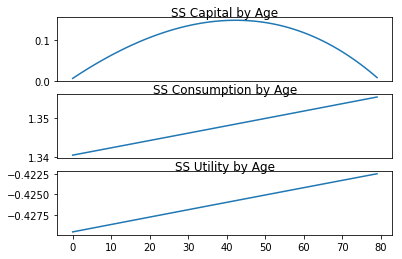

Kbar:   7.943210686243731
Ybar:   [2.06537363]
Cbar:   107.83217737006362
Ibar:   [-105.76680374]
Tbar:   [0.07149584]
wbar:   [1.34249286]
rbar:   [0.09100612]


In [5]:
# take a guess for steady state values of k
kguess = 0.001
guessXY = kguess*np.ones(nx)

# find the steady state values using LinApp_FindSS
XYbar = LinApp_FindSS(Modeldyn, params, guessXY, Zbar, nx, ny)
kbar = XYbar[0:nx]

# set up steady state input vector
theta0 = np.concatenate([kbar, kbar, kbar, Zbar, Zbar])

# check SS solution
check = Modeldyn(theta0, params)
print ('check: ', np.max(np.abs(check)))
if np.max(np.abs(check)) > 1.E-6:
    print ('Have NOT found steady state')

# find other steady state values
Kbar, Ybar, wbar, rbar, Tbar, cbar, Cbar, Ibar, ubar = Modeldefs(kbar, kbar, Zbar, params) 
Cbar = np.sum(cbar)

# plot some of these as funtions of age
plt.subplot(3, 1, 1)
plt.plot(kbar)
plt.xticks([])
plt.title('SS Capital by Age', y=.92)

plt.subplot(3, 1, 2)
plt.plot(cbar)
plt.xticks([])
plt.title('SS Consumption by Age', y=.92)

plt.subplot(3, 1, 3)
plt.plot(ubar)
plt.title('SS Utility by Age', y=.92)

plt.show()

# print values of aggregates
print('Kbar:  ', Kbar)
print('Ybar:  ', Ybar)
print('Cbar:  ', Cbar)
print('Ibar:  ', Ibar)
print('Tbar:  ', Tbar)
print('wbar:  ', wbar)
print('rbar:  ', rbar)

### Solving for the Policy Function Parameters

The next step is to find the derivatives of the Gamma function and then use these to solve for the coefficients of the linear policy function.  This requires using LinApp_Deriv and LinApp_Solve.

We linearize or log-linearize the $\Gamma(X_{t+1}, X_t, X_{t-1}, Y_{t+1}, Y_t, Z_{t+1}, Z_t) = 0 $ function about the steady state to get the following approximations.

$$ A \tilde X_{t} + B\tilde X_{t-1} + C \tilde Y_{t} + D \tilde Z_{t} = 0$$

$$E_t\left\{F \tilde X_{t+1} + G \tilde X_{t} + H \tilde X_{t-1} + J \tilde Y_{t+1} + K \tilde Y_{t} + L \tilde Z_{t+1} + M \tilde Z_{t} \right\}= 0$$

The top equation approximates the equation(s) defining any jump variables, while the bottom one approximates the equations(s) defining the endogenous state variable(s).

Since we have no jump variables, we can ignore the top equation and write the bottom one as:

$$E_t\left\{F \tilde X_{t+1} + G \tilde X_{t} + H \tilde X_{t-1} + L \tilde Z_{t+1} + M \tilde Z_{t} \right\}= 0$$

The linearized policy and jump functions are given by:

$$\tilde X_{t} = P \tilde X_{t-1} + Q \tilde Z_{t}$$

$$\tilde Y_{t} = R \tilde X_{t-1} + S \tilde Z_{t}$$

Note that $\tilde X_{t}$ is $X_{t} - \bar X$ if we are simply linearizing, and is $\frac{X_{t} - $X_{t} - \bar X$}{$X_{t} - \bar X}$ if we are log-linearizing.  The `LinApp_Deriv` function has an option that takes the appropriate derivatives.


In [6]:
# find the derivatives matrices
[AA, BB, CC, DD, FF, GG, HH, JJ, KK, LL, MM] = \
    LinApp_Deriv(Modeldyn, params, theta0, nx, ny, nz, logX)

# set value for NN    
NN = rho
    
# find the policy and jump function coefficients
PP, QQ, RR, SS = \
    LinApp_Solve(AA,BB,CC,DD,FF,GG,HH,JJ,KK,LL,MM,NN,Zbar,Sylv)


### Simulating the Model

Finally we simulate our model using LinApp_SSL

This function takes the form - LinApp_SSL(X0, Z, XYbar, logX, PP, QQ, RR, SS), where X0 is the starting value and Z is a numpy array containing a history of Z's generated using the law of motion.  Both Z and kbar must be 2-dimensional numpy arrays.


In [7]:
# generate a history of Z's
nobs = 250
Zhist = np.zeros((nobs+1,1))
for t in range(1, nobs+1):
    Zhist[t,0] = rho*Zhist[t,0] + sigma*np.random.normal(0., 1.)

XYbar = kbar
X0 = kbar

# simulate the model
Xhist, Yhist = \
    LinApp_SSL(X0, Zhist, XYbar, logX, PP, QQ, RR, SS)

With a history of k's and z's we have a history of all our state variables.  We can use our definitions function to get the histories of all the other variables.

In [8]:
# generate non-state variables
Khist = np.zeros(nobs)
Yhist = np.zeros(nobs)
whist = np.zeros(nobs)
rhist = np.zeros(nobs)
Thist = np.zeros(nobs)
chist = np.zeros((nobs,S))
Chist = np.zeros(nobs)
Ihist = np.zeros(nobs)
uhist = np.zeros((nobs,S))

for t in range(0, nobs):
    Khist[t], Yhist[t], whist[t], rhist[t], Thist[t], chist[t,:], Chist[t], Ihist[t], uhist[t,:] \
        = Modeldefs(Xhist[t+1,:], Xhist[t,:], Zhist[t,:], params) 

Lastly we can plot our simulated data

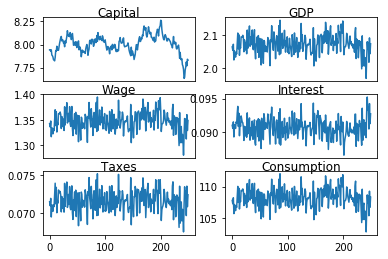

In [9]:
# plot
plt.subplot(3, 2, 1)
plt.plot(Khist)
plt.xticks([])
plt.title('Capital', y=.92)

plt.subplot(3, 2, 2)
plt.plot(Yhist)
plt.xticks([])
plt.title('GDP', y=.92)

plt.subplot(3, 2, 3)
plt.plot(whist)
plt.xticks([])
plt.title('Wage', y=.92)

plt.subplot(3, 2, 4)
plt.plot(rhist)
plt.xticks([])
plt.title('Interest', y=.92)

plt.subplot(3, 2, 5)
plt.plot(Thist)
plt.title('Taxes', y=.92)

plt.subplot(3, 2, 6)
plt.plot(Chist)
plt.title('Consumption', y=.92)

plt.show()